In [2]:
import pandas as pd 
import numpy as np 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Loading CBIS-DDSM in Pandas Data-Frame**

In [3]:
dicom_data = pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')

**Displaying first 10 rows**

In [4]:
dicom_data.head(10)

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN
5,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,NaN,8,8,BREAST,1981,20160503,111620.055,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.153339052913121382622...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.157384031212566921514...,82702.0
6,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,NaN,16,16,BREAST,393,20160503,111620.055,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.153339052913121382622...,1,44323,ISO_IR 100,20170830.0,DDSM,1.3.6.1.4.1.9590.100.1.2.157384031212566921514...,215032.0
7,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...,NaN,16,16,BREAST,611,20160503,122938.838,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.178994714611485132105...,1,24057,ISO_IR 100,20170830.0,DDSM,1.3.6.1.4.1.9590.100.1.2.250103550412831547020...,215300.0
8,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...,NaN,8,8,BREAST,3571,20160503,122938.838,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.178994714611485132105...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.250103550412831547020...,84849.0
9,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...,NaN,8,8,BREAST,2371,20160503,131321.302,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.411833492612373627114...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.407544576612957992910...,90204.0


Exploring Data-Types

In [5]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [6]:
# Selecting rows from the DataFrame dicom_data where the 'SeriesDescription' column is equal to 'cropped images'
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path

# Displaying the first few rows of the resulting DataFrame
cropped_images.head()


0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

**Loading Images of CBIS-DDSM**

In [7]:
image_dir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

Adjusting file paths to match the target directory

In [8]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()


0     ../input/cbis-ddsm-breast-cancer-image-dataset...
3     ../input/cbis-ddsm-breast-cancer-image-dataset...
6     ../input/cbis-ddsm-breast-cancer-image-dataset...
7     ../input/cbis-ddsm-breast-cancer-image-dataset...
10    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: image_path, dtype: object

Opening the first five images from the cropped_images Series and converting them to grayscale

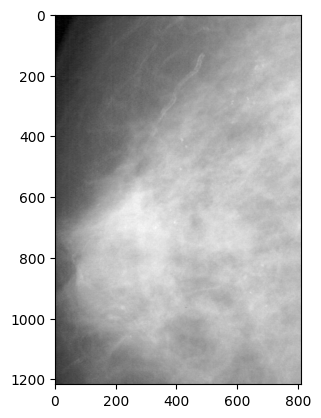

In [9]:
for file  in cropped_images[0:5]:
  cropped_images_show = PIL.Image.open(file)
  gray_img= cropped_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

**Considering full mammogram images**

In [10]:
# Selecting rows from the DataFrame dicom_data where the 'SeriesDescription' column is equal to 'full mammogram images'
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [11]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     ../input/cbis-ddsm-breast-cancer-image-dataset...
2     ../input/cbis-ddsm-breast-cancer-image-dataset...
11    ../input/cbis-ddsm-breast-cancer-image-dataset...
12    ../input/cbis-ddsm-breast-cancer-image-dataset...
15    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: image_path, dtype: object

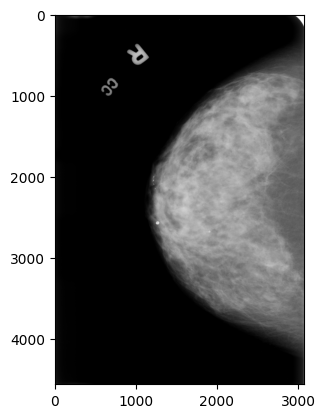

In [12]:
for file  in full_mammogram_images[0:5]:
  full_mammogram_images_show = PIL.Image.open(file)
  gray_img= full_mammogram_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

**Considering ROI images**

In [13]:
# Selecting rows from the DataFrame dicom_data where the 'SeriesDescription' column is equal to 'ROI mask images'
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [14]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     ../input/cbis-ddsm-breast-cancer-image-dataset...
8     ../input/cbis-ddsm-breast-cancer-image-dataset...
9     ../input/cbis-ddsm-breast-cancer-image-dataset...
14    ../input/cbis-ddsm-breast-cancer-image-dataset...
20    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: image_path, dtype: object

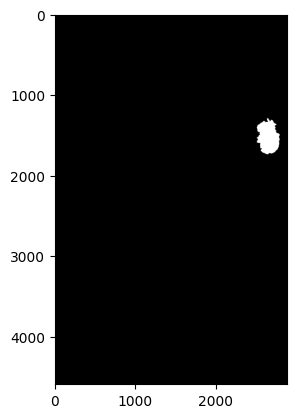

In [15]:
for file  in ROI_mask_images[0:5]:
  ROI_mask_images_show = PIL.Image.open(file)
  gray_img= ROI_mask_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

# Storing calc_case_description_train_set in pandas dataframe

In [16]:
data_1=pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')

In [17]:
data_1.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [18]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [19]:
data_1.describe()

,breast density,abnormality id,assessment,subtlety
count,1546.000000,1546.000000,1546.000000,1546.000000
mean,2.663648,1.415265,3.258732,3.411384
std,0.937219,0.903571,1.229231,1.179754
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.000000,4.000000,3.000000
75%,3.000000,1.000000,4.000000,4.000000
max,4.000000,7.000000,5.000000,5.000000


# Loading mass_case_description_train_set

In [20]:
data_2=pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
data_2.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [21]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [22]:
data_2.describe()

,breast_density,abnormality id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


**Making independent dataframe**

In [23]:
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


**DATA_CLEANING**

In [24]:
columns_to_drop=['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate','ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID','StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber']
dicom_cleaning_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [25]:
dicom_cleaning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [26]:
#counting number of null values
dicom_cleaning_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [27]:
#filling missing vlues with back-fill method from bottom to top
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data.isna().sum()

/tmp/ipykernel_47/4246499258.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_47/4246499258.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)


file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

**making copy of data-1 and renaming columns**

In [28]:
Data_cleaning_1 = data_1.copy()
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})

**Changing Datatypes**

In [29]:
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

In [30]:
Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [31]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1.isna().sum()

/tmp/ipykernel_47/2703319416.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_47/2703319416.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [32]:
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast_density           1546 non-null   int64   
 2   left_or_right_breast     1546 non-null   category
 3   image_view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality_type         1546 non-null   category
 6   calc_type                1546 non-null   category
 7   calc_distribution        1546 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

**Making Copy of data_2 to rename columns and handle missing calues**

In [33]:
Data_cleaning_2 = data_2.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [34]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2.isna().sum()

/tmp/ipykernel_47/73198642.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_47/73198642.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [35]:
Data_cleaning_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left_or_right_breast     1318 non-null   category
 3   image_view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality_type         1318 non-null   category
 6   mass_shape               1318 non-null   category
 7   mass_margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

# Loading Histopathological Images

In [37]:
breast_img = glob.glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive = True)

Loading first 3 images to see wether specified patern of images are loaded 

In [42]:
for imgname in breast_img[:3]:
    print(imgname)

../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png


Creating empty list to store cancerous and non-cancerous images

In [43]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)
    
    elif img[-5] == '1' :
        can_img.append(img)

In [44]:
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer 
        
total_img_num = non_can_num + can_num
        
print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


In [45]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


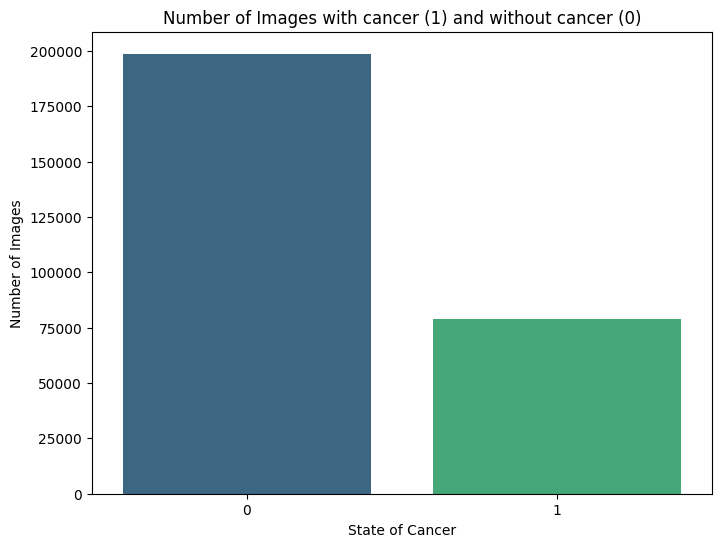

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame for the count plot
data_insight_1 = pd.DataFrame({'state of cancer': ['0', '1'],
                                'Number of Images': [198738, 78786]})

# Creating the count plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='state of cancer', y='Number of Images', data=data_insight_1, palette='viridis')

# Adding labels and title
plt.xlabel('State of Cancer')
plt.ylabel('Number of Images')
plt.title('Number of Images with cancer (1) and without cancer (0)')

# Displaying the count plot
plt.show()


In [47]:
r= pd.DataFrame(dicom_cleaning_data['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

,SeriesDescription_counts,count
0,cropped images,3859
1,ROI mask images,3340
2,full mammogram images,3038


In [48]:
q= pd.DataFrame(dicom_cleaning_data['PatientOrientation'].value_counts())
q= q.reset_index()
q= q.rename(columns={'PatientOrientation':'PatientOrientation_counts', 'index':'PatientOrientation'})
q

,PatientOrientation_counts,count
0,MLO,5434
1,CC,4803


In [49]:
f= pd.DataFrame(dicom_cleaning_data['BodyPartExamined'].value_counts())
f= f.reset_index()
f= f.rename(columns={'BodyPartExamined':'BodyPartExamined_counts', 'index':'Breast part Examined'})
f

,BodyPartExamined_counts,count
0,BREAST,9671
1,Left Breast,318
2,Right Breast,248


In [50]:
data_insight_2 = pd.DataFrame({'abnormality':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'counts_of_abnormalties':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_insight_2

,abnormality,counts_of_abnormalties
0,calcification,1546
1,mass,1318


In [51]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
print(x,y)

728 818


In [52]:
data_insight_3 = pd.DataFrame({'left_or_right_breast':['RIGHt','LEFT'] , 'Counts':[x,y]})
data_insight_3

,left_or_right_breast,Counts
0,RIGHt,728
1,LEFT,818


In [53]:
insight_3 = px.bar(data_insight_3, y= 'Counts', x='left_or_right_breast',color = 'left_or_right_breast')
insight_3.update_layout(title_text=' clacfication cancer position of breast ', title_x=0.5)
insight_3.show()

In [54]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z= z.rename(columns={'calc_type':'calc_type_counts'})
z

,calc_type_counts,count
0,PLEOMORPHIC,664
1,AMORPHOUS,139
2,PUNCTATE,106
3,LUCENT_CENTER,93
4,VASCULAR,82
5,FINE_LINEAR_BRANCHING,77
6,COARSE,35
7,ROUND_AND_REGULAR-LUCENT_CENTER,33
8,PLEOMORPHIC-FINE_LINEAR_BRANCHING,28
9,ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE,24


In [55]:
g = pd.DataFrame(Data_cleaning_1['calc_distribution'].value_counts())
g = g.reset_index()
g= g.rename(columns={'calc_distribution':'calc_distribution_counts'})
g

,calc_distribution_counts,count
0,CLUSTERED,1000
1,SEGMENTAL,214
2,REGIONAL,118
3,LINEAR,111
4,CLUSTERED-LINEAR,49
5,DIFFUSELY_SCATTERED,43
6,CLUSTERED-SEGMENTAL,5
7,LINEAR-SEGMENTAL,5
8,REGIONAL-REGIONAL,1


In [56]:
I = pd.DataFrame(Data_cleaning_1['breast_density'].value_counts())
I =I.reset_index()
I= I.rename(columns={'index':'Breast density','breast_density':'counts'})
I

,counts,count
0,3,539
1,2,501
2,4,331
3,1,175


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



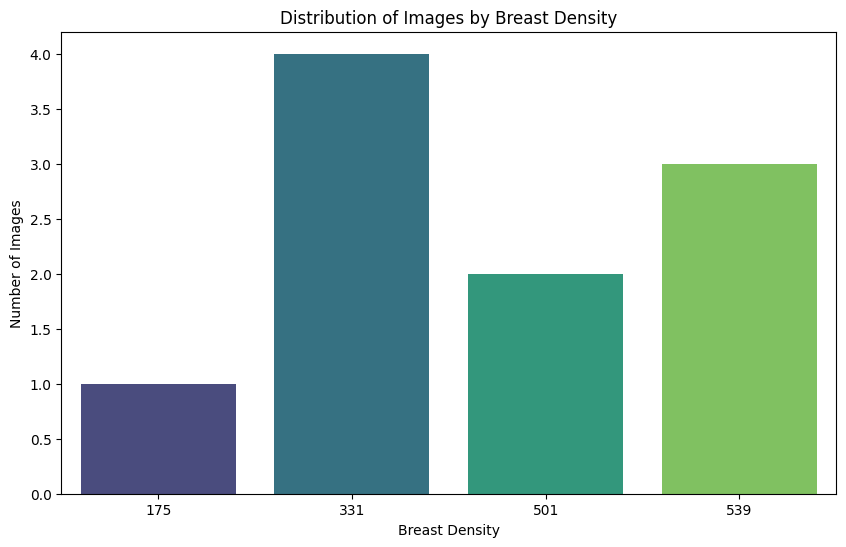

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'I' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=I, palette='viridis')

plt.xlabel('Breast Density')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Breast Density')

plt.show()


In [58]:
h = pd.DataFrame(Data_cleaning_1['assessment'].value_counts())
h =h.reset_index()
h=h.rename(columns={'index':'Breast assessment','assessment':'counts'})
h

,counts,count
0,4,753
1,2,482
2,5,159
3,3,89
4,0,63


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



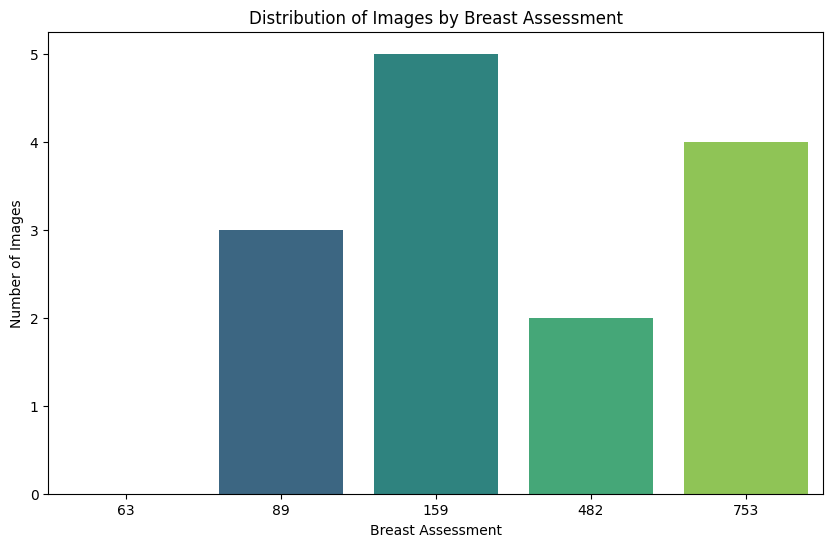

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'h' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=h, palette='viridis')

plt.xlabel('Breast Assessment')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Breast Assessment')

plt.show()


In [60]:
v = pd.DataFrame(Data_cleaning_1['subtlety'].value_counts())
v =v.reset_index()
v=v.rename(columns={'index':'Breast subtlety','subtlety':'counts'})
v

,counts,count
0,3,502
1,5,361
2,4,346
3,2,242
4,1,95


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



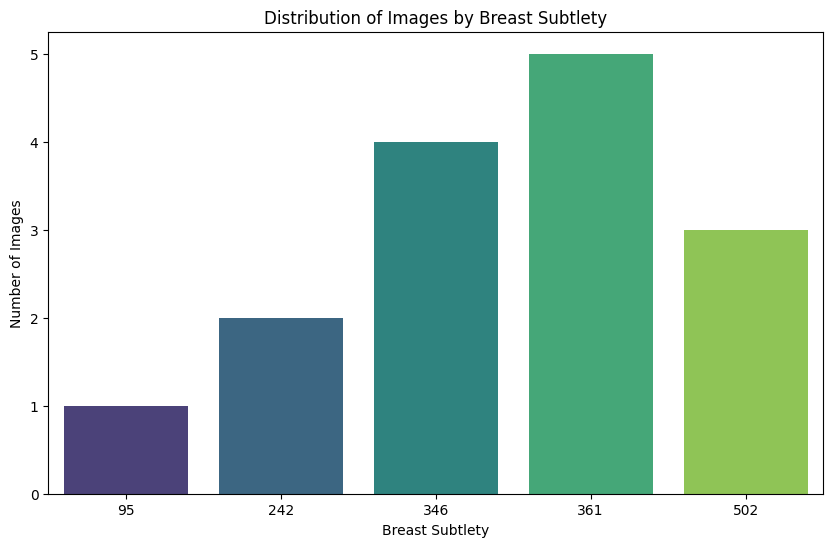

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'v' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=v, palette='viridis')

plt.xlabel('Breast Subtlety')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Breast Subtlety')

plt.show()


In [62]:
a = pd.DataFrame(Data_cleaning_1['pathology'].value_counts())
a =a.reset_index()
a=a.rename(columns={'index':'pathology','pathology':'counts'})
a

,counts,count
0,MALIGNANT,544
1,BENIGN,528
2,BENIGN_WITHOUT_CALLBACK,474


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



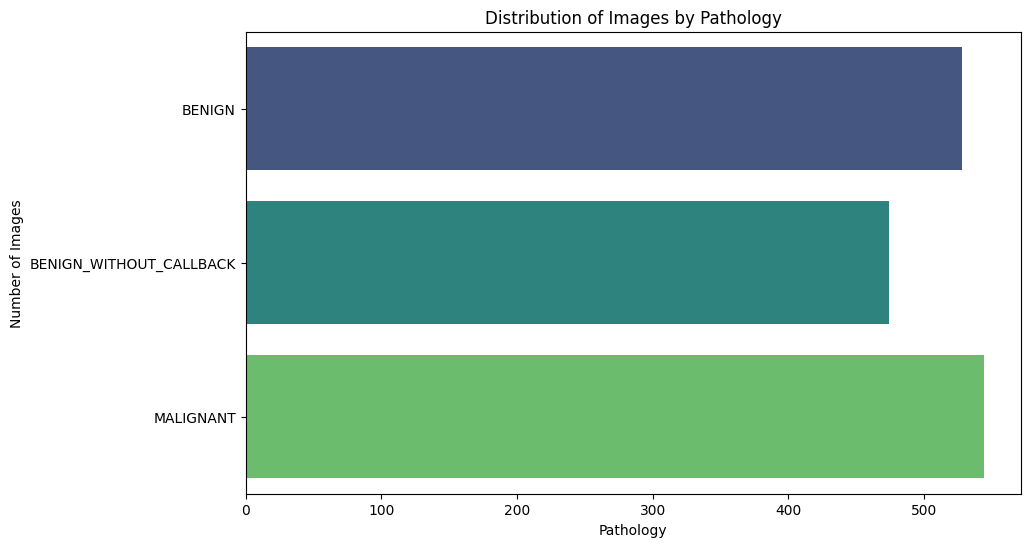

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'a' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=a, palette='viridis')

plt.xlabel('Pathology')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Pathology')

plt.show()


In [64]:
b = pd.DataFrame(Data_cleaning_1['image_view'].value_counts())
b =b.reset_index()
b=b.rename(columns={'index':'image_view','image_view':'counts'})
b

,counts,count
0,MLO,807
1,CC,739


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



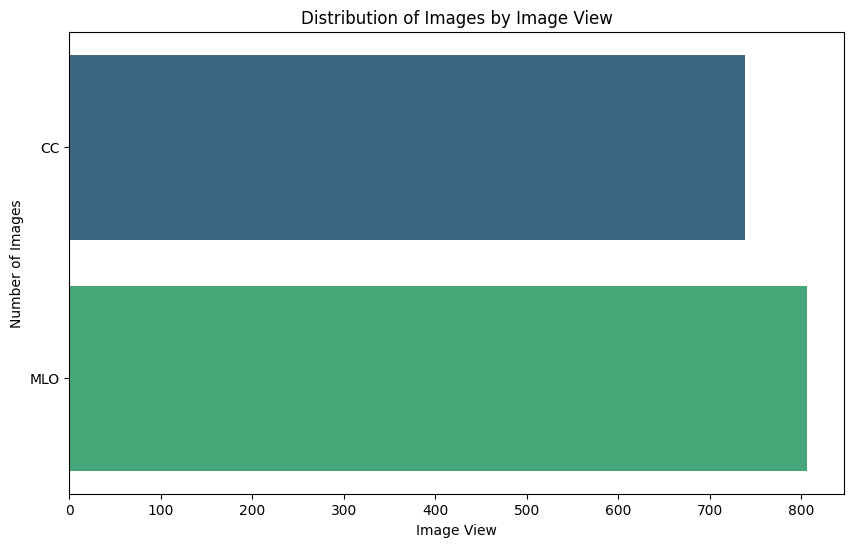

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'b' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=b, palette='viridis')

plt.xlabel('Image View')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Image View')

plt.show()


# Visualizing Data_cleaning_2

In [66]:
j = pd.DataFrame(Data_cleaning_2['breast_density'].value_counts())
j =j.reset_index()
j= j.rename(columns={'index':'Breast density','breast_density':'counts'})
j

,counts,count
0,2,585
1,3,337
2,1,287
3,4,109


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



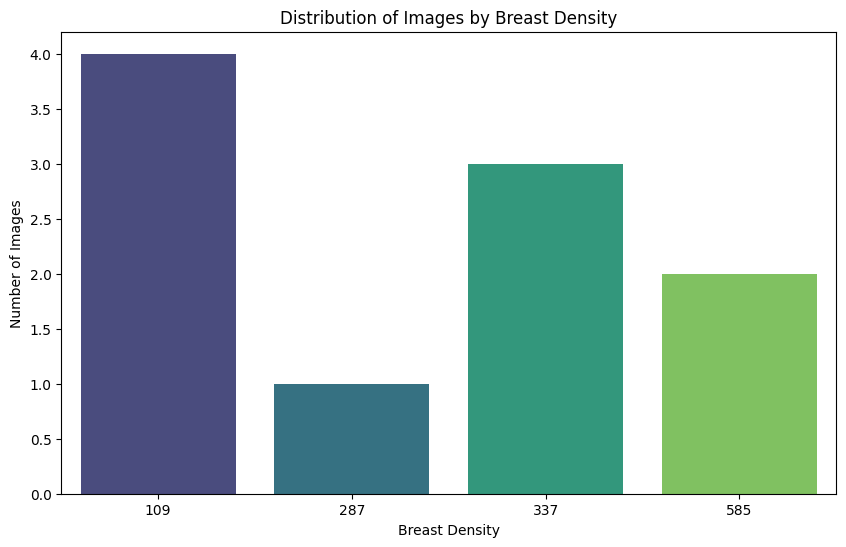

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'j' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=j, palette='viridis')

plt.xlabel('Breast Density')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Breast Density')

plt.show()


In [68]:
k = pd.DataFrame(Data_cleaning_2['left_or_right_breast'].value_counts())
k =k.reset_index()
k= k.rename(columns={'index':'left_or_right_breast','left_or_right_breast':'counts'})
k

,counts,count
0,RIGHT,687
1,LEFT,631


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



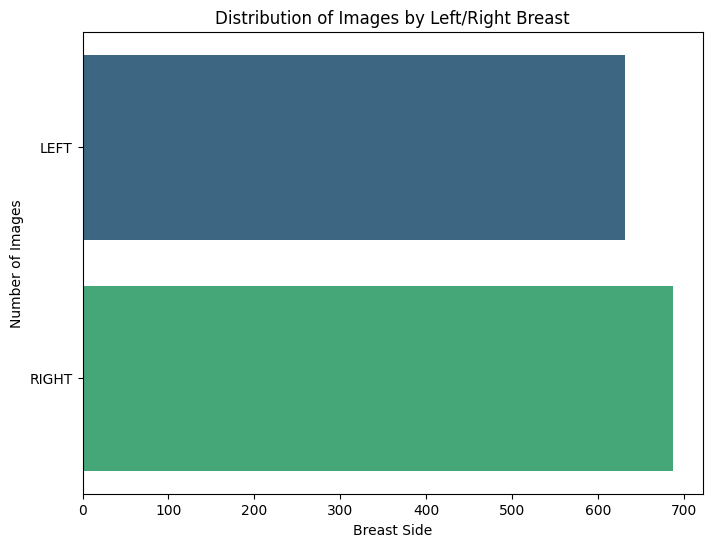

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'k' is the DataFrame after the operations
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='counts', data=k, palette='viridis')

plt.xlabel('Breast Side')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Left/Right Breast')

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



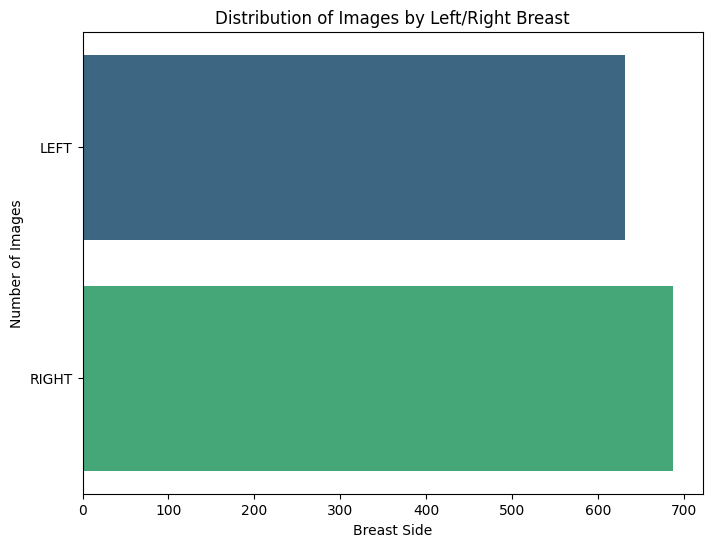

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'k' is the DataFrame after the operations
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='counts', data=k, palette='viridis')

plt.xlabel('Breast Side')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Left/Right Breast')

plt.show()


In [71]:
p = pd.DataFrame(Data_cleaning_2['pathology'].value_counts())
p =p.reset_index()
p=p.rename(columns={'index':'pathology','pathology':'counts'})
p

,counts,count
0,MALIGNANT,637
1,BENIGN,577
2,BENIGN_WITHOUT_CALLBACK,104


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



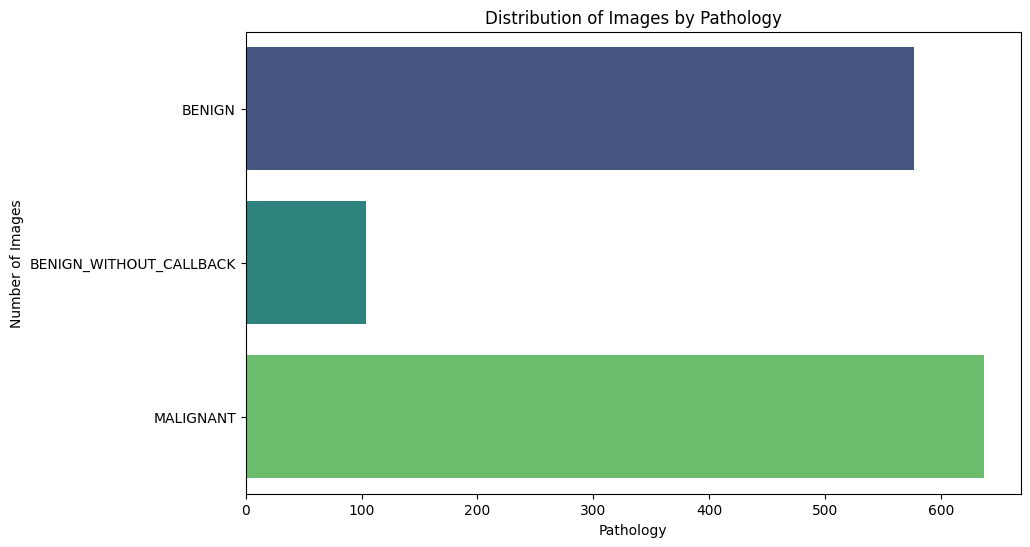

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'p' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=p, palette='viridis')

plt.xlabel('Pathology')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Pathology')

plt.show()


In [73]:
c = pd.DataFrame(Data_cleaning_2['subtlety'].value_counts())
c =c.reset_index()
c=c.rename(columns={'index':'Breast subtlety','subtlety':'counts'})
c

,counts,count
0,5,543
1,4,375
2,3,257
3,2,100
4,1,41
5,0,2


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



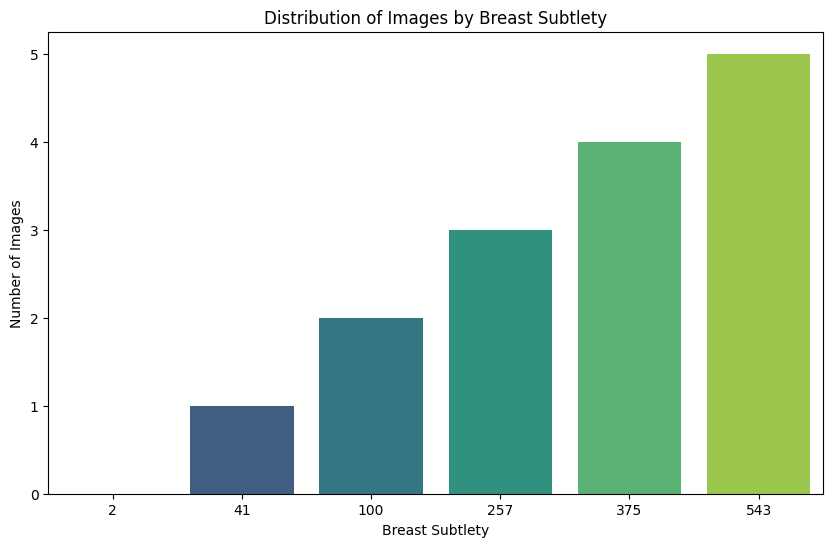

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'c' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=c, palette='viridis')

plt.xlabel('Breast Subtlety')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Breast Subtlety')

plt.show()


In [75]:
o = pd.DataFrame(Data_cleaning_2['assessment'].value_counts())
o =o.reset_index()
o=o.rename(columns={'index':'Breast assessment','assessment':'counts'})
o

,counts,count
0,4,533
1,5,299
2,3,279
3,0,129
4,2,77
5,1,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



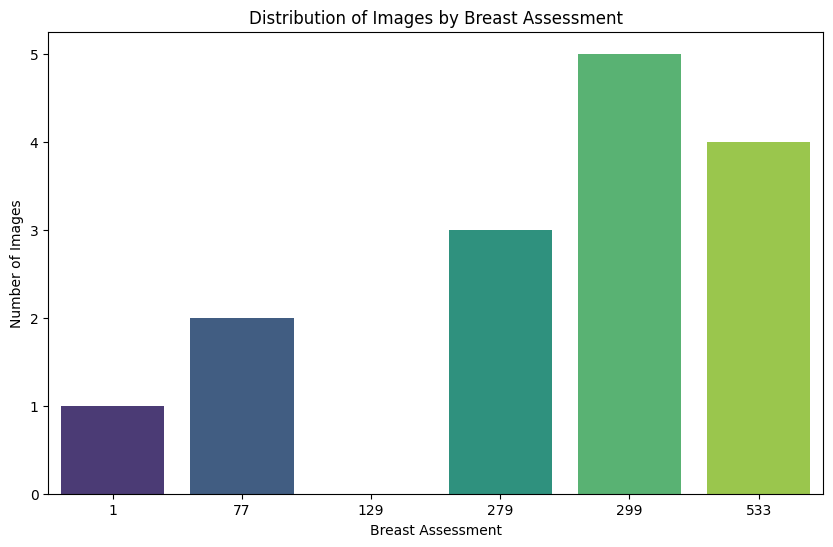

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'o' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=o, palette='viridis')

plt.xlabel('Breast Assessment')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Breast Assessment')

plt.show()


In [77]:
s = pd.DataFrame(Data_cleaning_2['mass_shape'].value_counts())
s = s.reset_index()
s= s.rename(columns={'mass_shape':'mass_shape_counts'})
s

,mass_shape_counts,count
0,IRREGULAR,351
1,OVAL,323
2,LOBULATED,305
3,ROUND,123
4,ARCHITECTURAL_DISTORTION,80
5,IRREGULAR-ARCHITECTURAL_DISTORTION,47
6,LYMPH_NODE,26
7,ASYMMETRIC_BREAST_TISSUE,20
8,FOCAL_ASYMMETRIC_DENSITY,19
9,OVAL-LYMPH_NODE,6


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



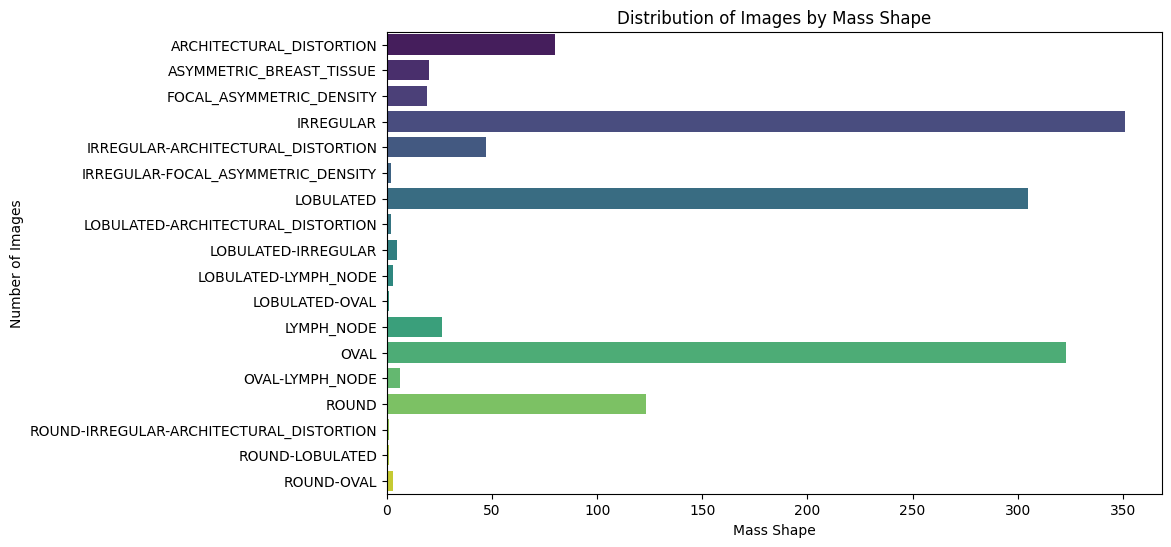

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 's' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='mass_shape_counts', data=s, palette='viridis')

plt.xlabel('Mass Shape')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Mass Shape')

plt.show()


In [79]:
u = pd.DataFrame(Data_cleaning_2['mass_margins'].value_counts())
u = u.reset_index()
u= u.rename(columns={'index':'mass_margins','mass_margins':'counts'})
u

,counts,count
0,CIRCUMSCRIBED,305
1,SPICULATED,303
2,ILL_DEFINED,288
3,OBSCURED,201
4,MICROLOBULATED,113
5,CIRCUMSCRIBED-ILL_DEFINED,27
6,ILL_DEFINED-SPICULATED,26
7,CIRCUMSCRIBED-OBSCURED,19
8,OBSCURED-ILL_DEFINED,19
9,OBSCURED-ILL_DEFINED-SPICULATED,4


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



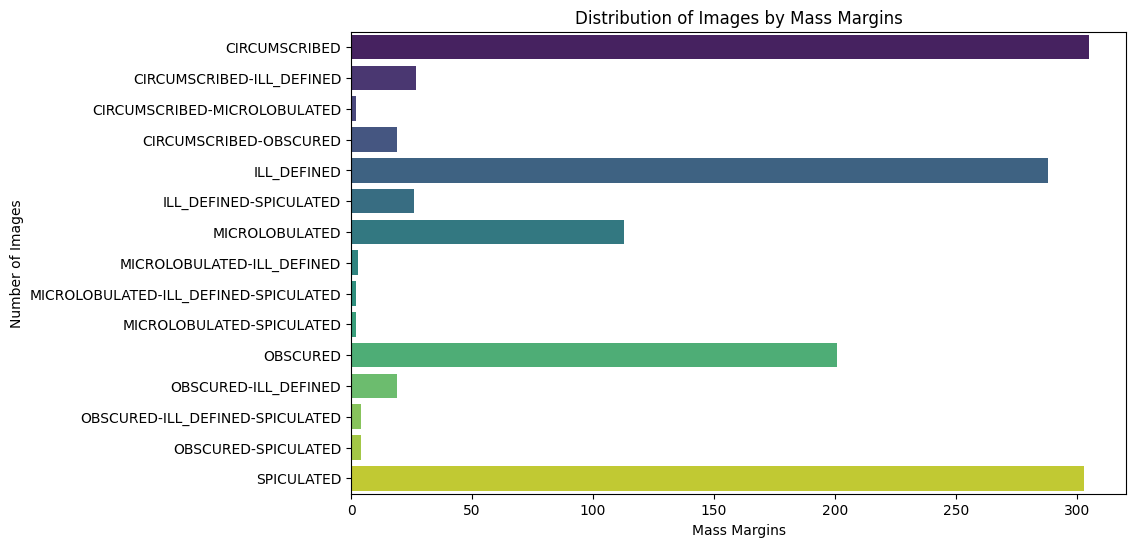

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'u' is the DataFrame after the operations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='counts', data=u, palette='viridis')

plt.xlabel('Mass Margins')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Mass Margins')

plt.show()


In [81]:
t= pd.DataFrame(Data_cleaning_2['image_view'].value_counts())
t=t.reset_index()
t=t.rename(columns={'index':'image_view','image_view':'counts'})
t

,counts,count
0,MLO,711
1,CC,607


# Display Random Samples of Non-Cancer and Cancer Images

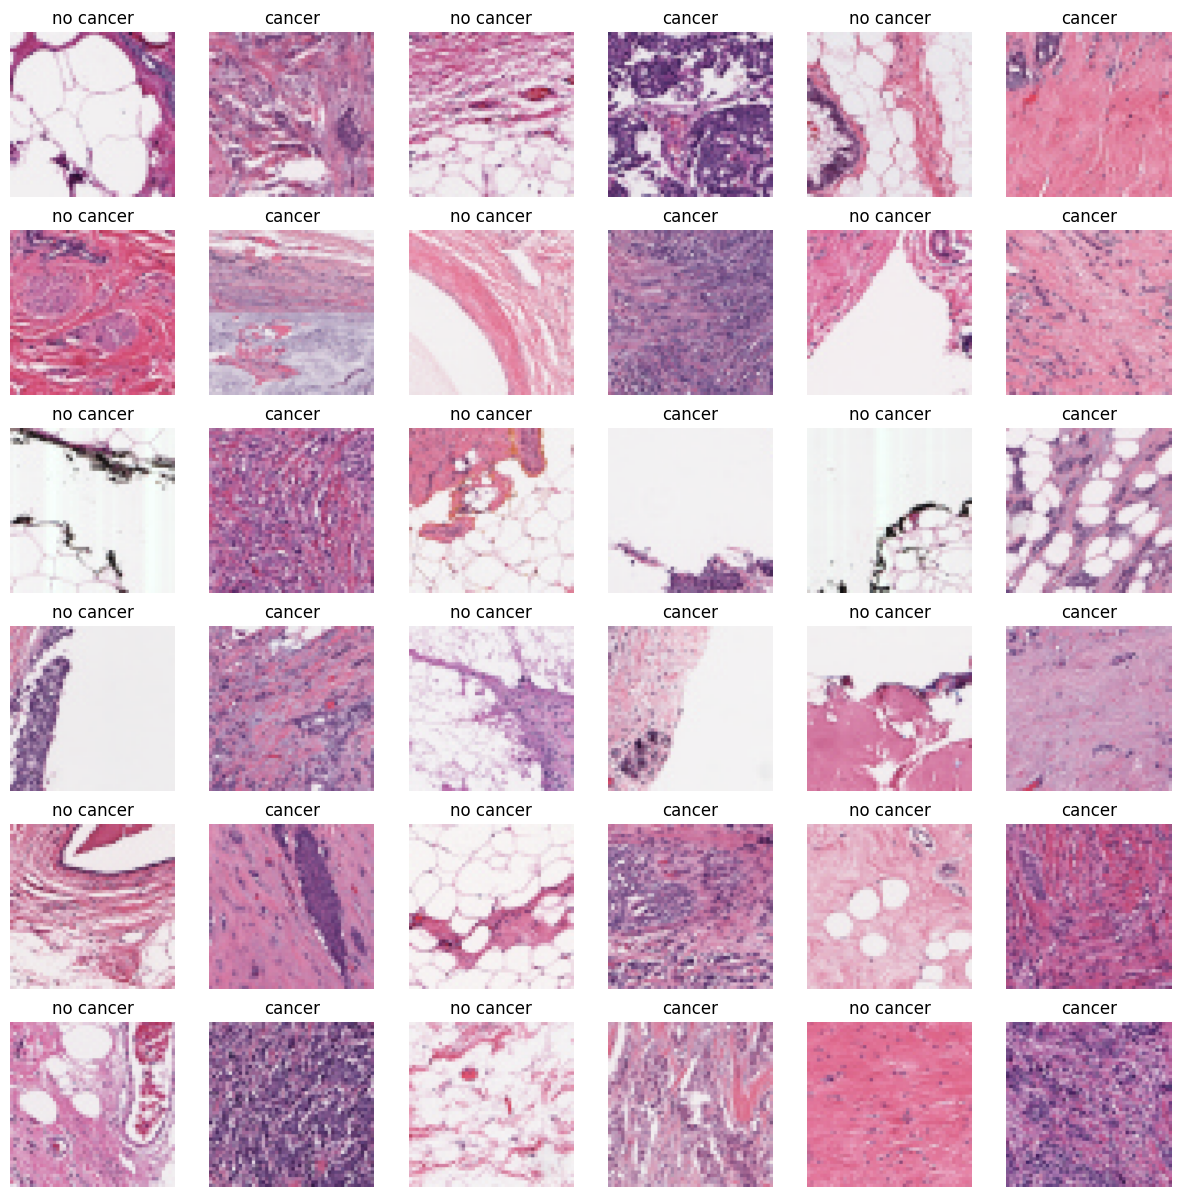

In [82]:
from keras.preprocessing import image
#Creating a larger figure for displaying the grid of images
plt.figure(figsize = (15, 15))
# Randomly selecting 18 indices from the 'non_can_img' and 'can_img' lists
some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:
    
        img = image.load_img((non_can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = image.load_img((can_img[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

# Preprocessing Histopathological images by resizing and creating arrays with labels (0 for non-cancer, 1 for cancer) using OpenCV and random sampling.

In [83]:
from matplotlib.image import imread
import cv2
import random  # Don't forget to import the 'random' module

# Assuming 'non_can_img' and 'can_img' are defined somewhere before this code
some_non_img = random.sample(non_can_img, len(non_can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

for img in some_can_img:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])


# Extracting Labels

In [87]:
X = []
y = []

# Ensure that all images have the same shape (50, 50, 3) and are in a tuple with the label
non_img_arr = [(cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR), label) for img, label in non_img_arr]
can_img_arr = [(cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR), label) for img, label in can_img_arr]

# Extract image arrays and labels separately
non_img_data = np.array([(img, label) for img, label in non_img_arr], dtype=object)
can_img_data = np.array([(img, label) for img, label in can_img_arr], dtype=object)

# Concatenate image arrays
breast_img_arr = np.concatenate((non_img_data[:, 0], can_img_data[:, 0]))
random.shuffle(breast_img_arr)

# Concatenate labels
labels = np.concatenate((non_img_data[:, 1], can_img_data[:, 1]))
random.shuffle(labels)

for feature, label in zip(breast_img_arr, labels):
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)

print('X shape: {}'.format(X.shape))


X shape: (277524, 50, 50, 3)


 splitting the data into training and testing sets, as well as converting the labels to categorical format.

In [89]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))


X_train shape: (208143, 50, 50, 3)
X_test shape: (69381, 50, 50, 3)
y_train shape: (208143, 2)
y_test shape: (69381, 2)


In [90]:
import tensorflow as tf 
tf.random.set_seed(100)

In [92]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(2, activation = 'softmax')
])


# RESNET

In [93]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense
from keras.layers import Add
from tensorflow.keras.layers import UpSampling2D

modelR = Sequential()

# Convolution Layer 1
#modelR.add(Conv2D(64, (7, 7), strides=(2, 2), padding='same', input_shape=(100, 100, 3))
modelR.add(Conv2D(64, (7, 7), strides=(2, 2), padding='same', input_shape=(50, 50, 3)))

modelR.add(BatchNormalization())
modelR.add(Activation('relu'))

# Max-Pooling Layer 1
modelR.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
# Residual Blocks (1-4)
for _ in range(4):
    modelR.add(Conv2D(64, (1, 1), padding='valid'))
    modelR.add(BatchNormalization())
    modelR.add(Activation('relu'))
    modelR.add(Conv2D(64, (3, 3), padding='same'))
    modelR.add(BatchNormalization())
    modelR.add(Activation('relu'))
    modelR.add(Conv2D(256, (1, 1), padding='valid'))
    modelR.add(Activation('relu'))
            # UpSampling Layer
modelR.add(UpSampling2D(size=(2, 2)))  # This will resize the feature maps to (50, 50)

# Convolution Layer to get 3 channels
modelR.add(Conv2D(3, (1, 1), padding='valid'))
# Activation Layer
#modelR.add(Activation('relu'))
                                            # Now, to get the final output shape as (50, 50, 3), you need to add a transpose convolutional layer
                                        # that upsamples the spatial dimensions.
#modelR.add(Conv2D(3, (1, 1), padding='valid'))  # Adjust the number of filters to 3 for the RGB channels
#modelR.add(Activation('relu'))
#modelR.add(Conv2D(3, (3, 3), padding='same'))  # Another convolution for refinement
#modelR.add(Activation('relu'))
#modelR.add(Conv2D(3, (3, 3), padding='same'))  # Another convolution for refinement

print(modelR.output.shape)
'''
#Branch 2 (skip connection)
skip = Sequential()
skip.add(Conv2D(256, (1, 1), strides=(2, 2), padding='same', input_shape=(100, 100, 3)))
skip.add(Conv2D(256, (1, 1), strides=(2, 2), padding='same'))
skip.add(UpSampling2D((2, 2)))
skip.add(Conv2D(3, (1, 1), padding='valid'))

print(skip.output.shape)

# Assuming you have two branches 'modelR' and 'skip' defined already
# Define input layers for both branches
inputR = modelR.input
inputSkip = skip.input

# Get the outputs of each branch
outputR = modelR.output
outputSkip = skip.output

# Create the final output by adding the two branches
combined = Add()([outputR, outputSkip])

print(tf.shape(combined))

# Create a model with the inputs and the final output
#modelR = Model(inputs=[inputR, inputSkip], outputs=combined)
'''

'''
#modelR.add(skip)  # Add the skip connection to the main model

#modelR = tf.TensorShape(modelR).as_list()[1:]
#modelR=modelR[1:]



#modelR.add(Add())([a, b])  # Add the two branches using the Add() operation
# Residual Blocks (5-7)
# Similar structure as blocks 1-4, repeated 3 times
'''
# Global Average Pooling
modelR.add(AveragePooling2D((7, 7)))

# Fully Connected Layer
modelR.add(Flatten())
modelR.add(Dense(1000, activation='softmax'))  # 1000 units for ImageNet classification
modelR.summary()
modelR.output.shape
print(modelR.output.shape)

print(modelR.input.shape)
'''
# AveragePooling2D Layer
x = AveragePooling2D((7, 7))(combined)

# Flatten Layer
x = Flatten()(x)

# Fully Connected Layer
output = Dense(2048, activation='softmax')(x)  # 1000 units for ImageNet classification

# Create the final model
modelR = Model(inputs=[inputR, inputSkip], outputs=output)


# Display the model summary
modelR.summary()
#Here, we add the AveragePooling2D layer by applying it to the combined tensor, then we apply the Flatten layer to the output of the AveragePooling2D, and finally, we add the Dense layer with 1000 units for ImageNet classification. This will define the layers correctly in your Functional model.
print(modelR.output[0].shape)

print(modelR.input[0].shape)

'''

(None, 26, 26, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 64)        9472      
                                                                 
 batch_normalization (Batch  (None, 25, 25, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        4160      
                                                                 
 batch_normalization_1 (Bat  (None, 

"\n# AveragePooling2D Layer\nx = AveragePooling2D((7, 7))(combined)\n\n# Flatten Layer\nx = Flatten()(x)\n\n# Fully Connected Layer\noutput = Dense(2048, activation='softmax')(x)  # 1000 units for ImageNet classification\n\n# Create the final model\nmodelR = Model(inputs=[inputR, inputSkip], outputs=output)\n\n\n# Display the model summary\nmodelR.summary()\n#Here, we add the AveragePooling2D layer by applying it to the combined tensor, then we apply the Flatten layer to the output of the AveragePooling2D, and finally, we add the Dense layer with 1000 units for ImageNet classification. This will define the layers correctly in your Functional model.\nprint(modelR.output[0].shape)\n\nprint(modelR.input[0].shape)\n\n"

# MOBILE_NET

In [94]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

modelM = Sequential()

# Initial Convolution Layer
modelM.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=(50, 50, 3)))
modelM.add(BatchNormalization())
modelM.add(ReLU())

# Depthwise Separable Convolution Blocks
modelM.add(DepthwiseConv2D((3, 3), padding='same'))
modelM.add(BatchNormalization())
modelM.add(ReLU())
modelM.add(Conv2D(64, (1, 1), padding='same'))
modelM.add(BatchNormalization())
modelM.add(ReLU())

modelM.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
modelM.add(BatchNormalization())
modelM.add(ReLU())
modelM.add(Conv2D(128, (1, 1), padding='same'))
modelM.add(BatchNormalization())
modelM.add(ReLU())

# Repeat this block to create more layers

# Global Average Pooling
modelM.add(GlobalAveragePooling2D())


# Fully Connected Layer
modelM.add(Dense(1000, activation='softmax'))  # 1000 units for ImageNet classification


# Set all layers to be trainable
for layer in modelM.layers:
    layer.trainable = True




# Optional: You can add more Dense layers for your specific classification task
modelM.summary()
print(modelM.output.shape)
print(modelM.input.shape)





#modelM.compile(optimizer='adam',  # Specify your choice of optimizer
 #             loss='categorical_crossentropy',  # Specify your loss function
#              metrics=['accuracy'])  # Specify evaluation metrics

# Load and preprocess your data
# Replace this with your actual data loading and preprocessing

# Train the model
#history = modelM.fit(x_train, y_train,  # x_train and y_train are your training data and labels
#                    validation_data=(x_val, y_val),  # Validation data and labels
#                    epochs=10,  # Number of training epochs
#                    batch_size=32)  # Mini-batch size


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 25, 25, 32)        896       
                                                                 
 batch_normalization_9 (Bat  (None, 25, 25, 32)        128       
 chNormalization)                                                
                                                                 
 re_lu (ReLU)                (None, 25, 25, 32)        0         
                                                                 
 depthwise_conv2d (Depthwis  (None, 25, 25, 32)        320       
 eConv2D)                                                        
                                                                 
 batch_normalization_10 (Ba  (None, 25, 25, 32)        128       
 tchNormalization)                                               
                                                      

# Xception

In [95]:
'''
from tensorflow.keras.applications.xception import Xception # Xception

#rows, cols,color = x_train[0].shape
print(X_train[0].shape)

base_modelX = Xception(input_shape=(50,50,3), weights='imagenet', include_top=False)
x = base_modelX.output
predictions = Flatten()(x)
# predictions = Dropout(0.3)(x)
# x = BatchNormalization()(x)
# x = Dense(128,kernel_initializer='he_uniform')(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x =  Dropout(0.2)(x)

# predictions = Dense(8, activation='softmax')(x)
modelX = Model(inputs=base_modelX.input,outputs=predictions)
modelX.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelX.summary()
print(modelX.output.shape)
#train_features = model_feat.predict(x_train)
#test_features=model_feat.predict(x_test)
'''

"\nfrom tensorflow.keras.applications.xception import Xception # Xception\n\n#rows, cols,color = x_train[0].shape\nprint(X_train[0].shape)\n\nbase_modelX = Xception(input_shape=(50,50,3), weights='imagenet', include_top=False)\nx = base_modelX.output\npredictions = Flatten()(x)\n# predictions = Dropout(0.3)(x)\n# x = BatchNormalization()(x)\n# x = Dense(128,kernel_initializer='he_uniform')(x)\n# x = BatchNormalization()(x)\n# x = Activation('relu')(x)\n# x =  Dropout(0.2)(x)\n\n# predictions = Dense(8, activation='softmax')(x)\nmodelX = Model(inputs=base_modelX.input,outputs=predictions)\nmodelX.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])\nmodelX.summary()\nprint(modelX.output.shape)\n#train_features = model_feat.predict(x_train)\n#test_features=model_feat.predict(x_test)\n"

# EFFICIENT-NET

In [96]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load the pre-trained EfficientNetB0 model (weights are initialized from ImageNet)
base_modelE = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(50, 50, 3))

# Add custom classification layers on top of the base model
x = GlobalAveragePooling2D()(base_modelE.output)
#x = Dense(1024, activation='relu')(x)
#output = Dense(1000, activation='softmax')(x)  # Replace NUM_CLASSES with your desired number of output classes

# Create the final model
modelE = Model(inputs=base_modelE.input, outputs=x)

# Optionally, you can choose to freeze some layers of the base model
for layer in base_modelE.layers:
    layer.trainable = True

# Compile the model
modelE.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelE.summary()
print(modelE.output.shape)
print(modelE.input.shape)

16705208/16705208 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 50, 50, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 50, 50, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 50, 50, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     

In [99]:
# Assuming you have your data loaded or generated in X_train, y_train_binary, X_val, y_val_binary

# Preprocess your data if needed (e.g., normalization, reshaping)
# Ensure that X_train and X_val have the same shape

# Example: normalization
X_train = X_train / 255.0
X_val = X_val / 255.0

ann = Sequential()
ann.add(Dense(16, activation='relu', input_shape=X_train[0].shape))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(16, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.summary()

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = ann.fit(X_train, y_train_binary, validation_data=(X_val, y_val_binary), epochs=10)

# Evaluate on training and validation data
loss_train, accuracy_train = ann.evaluate(X_train, y_train_binary)
print('Train Accuracy:', accuracy_train)

loss_val, accuracy_val = ann.evaluate(X_val, y_val_binary)
print('Validation Accuracy:', accuracy_val)


NameError: name 'X_val' is not defined